# MACD: Moving Average Convergence Divergence

1. It is a trend following momentum indicator which is calculated by taking the difference of two moving averages of an asset price (typically 12 period MA and 26 period MA).
1. Here we use Exponential Moving Average
1. A signal is also calculated which is again a moving average (typically 9 period) of the MACD line calculated in the above step/
1. The MACD line cutting the signal line from below signals bullish period and the former cutting the latter from above signals bearish period, this is called crossover strategy.
1. Many false positives - esp. when market is sideways
1. Suggested this indicator be used in conjunction with other indicators
1. Lagging indicator: Trails behind the actual price action

In [1]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

import TECourse
from TechnicalIndicators import TechnicalIndicators

In [2]:
ticker = 'MSFT'
start = datetime.datetime.today() - datetime.timedelta(1825)
end = datetime.datetime.today()
ohlcv = pd.DataFrame() 

In [3]:
ohlcv = yf.download(ticker, start, end)
ohlcv

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-03-14,52.709999,53.590000,52.630001,53.169998,48.755386,24083600
2016-03-15,52.750000,53.590000,52.740002,53.590000,49.140518,21104800
2016-03-16,53.450001,54.599998,53.400002,54.349998,49.837418,31691700
2016-03-17,54.209999,55.000000,54.000000,54.660000,50.121674,28223900
2016-03-18,54.919998,54.970001,53.450001,53.490002,49.048813,67625500
...,...,...,...,...,...,...
2021-03-04,226.740005,232.490005,224.259995,226.729996,226.729996,44584200
2021-03-05,229.520004,233.270004,226.460007,231.600006,231.600006,41842100
2021-03-08,231.369995,233.369995,227.130005,227.389999,227.389999,35245900


In [4]:
df = ohlcv.copy()

In [5]:
TechnicalIndicators.add_macd_signal(df)
df

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal
Date,,,,,,,,
2016-04-29,49.349998,50.250000,49.349998,49.869999,45.729378,48411700,-0.883879,-0.426521
2016-05-02,50.000000,50.750000,49.779999,50.610001,46.407951,33114500,-0.942552,-0.542142
2016-05-03,50.340000,50.410000,49.599998,49.779999,45.646847,26460200,-1.034830,-0.649939
2016-05-04,49.840000,50.060001,49.459999,49.869999,45.729378,24257600,-1.088887,-0.744207
2016-05-05,49.869999,50.299999,49.730000,49.939999,45.793564,25390700,-1.113803,-0.822426
...,...,...,...,...,...,...,...,...
2021-03-04,226.740005,232.490005,224.259995,226.729996,226.729996,44584200,-0.303149,1.778964
2021-03-05,229.520004,233.270004,226.460007,231.600006,231.600006,41842100,-0.429650,1.337241
2021-03-08,231.369995,233.369995,227.130005,227.389999,227.389999,35245900,-0.859705,0.897852


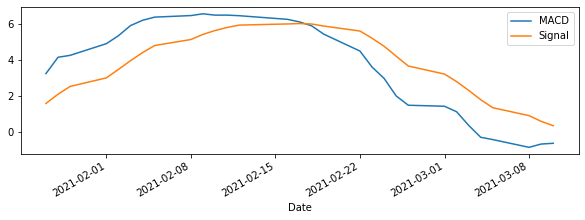

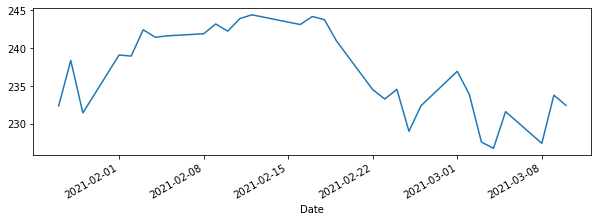

In [6]:
last_thirty_days = df[-30:]
last_thirty_days[['MACD', 'Signal']].plot(figsize=(10, 3));
plt.show();
last_thirty_days['Adj Close'].plot(figsize=(10, 3));

In [7]:
df = ohlcv.copy()
df = TECourse.MACD(df, 12, 26, 9)
df

,Open,High,Low,Close,Adj Close,Volume,MA_Fast,MA_Slow,MACD,Signal
Date,,,,,,,,,,
2016-04-29,49.349998,50.250000,49.349998,49.869999,45.729378,48411700,48.130125,49.014004,-0.883879,-0.426521
2016-05-02,50.000000,50.750000,49.779999,50.610001,46.407951,33114500,47.864407,48.806959,-0.942552,-0.542142
2016-05-03,50.340000,50.410000,49.599998,49.779999,45.646847,26460200,47.522408,48.557238,-1.034830,-0.649939
2016-05-04,49.840000,50.060001,49.459999,49.869999,45.729378,24257600,47.245986,48.334873,-1.088887,-0.744207
2016-05-05,49.869999,50.299999,49.730000,49.939999,45.793564,25390700,47.022144,48.135947,-1.113803,-0.822426
...,...,...,...,...,...,...,...,...,...,...
2021-03-04,226.740005,232.490005,224.259995,226.729996,226.729996,44584200,233.467285,233.770434,-0.303149,1.778964
2021-03-05,229.520004,233.270004,226.460007,231.600006,231.600006,41842100,233.180011,233.609662,-0.429650,1.337241
2021-03-08,231.369995,233.369995,227.130005,227.389999,227.389999,35245900,232.289240,233.148946,-0.859705,0.897852


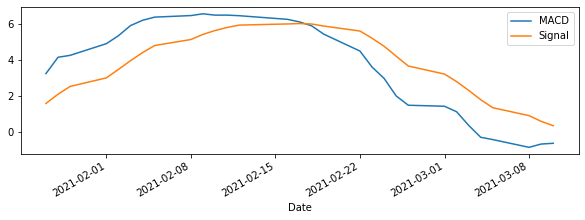

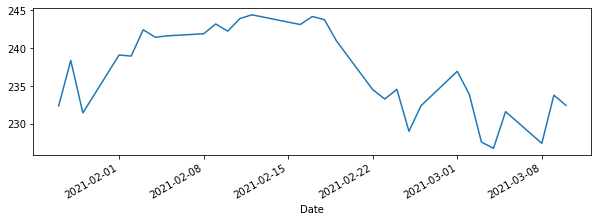

In [8]:
last_thirty_days = df[-30:]
last_thirty_days[['MACD', 'Signal']].plot(figsize=(10, 3));
plt.show();
last_thirty_days['Adj Close'].plot(figsize=(10, 3));